In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Удаляем лишние признаки, заполняем пропуски медианой

In [ ]:
df = df.drop(['agent','company'],axis=1)

median_value = df['children'].median()


df['children'].fillna(median_value, inplace=True)
df['country'].fillna('None', inplace=True)

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [ ]:
canceled = df.is_canceled.value_counts()
print(canceled)

0    75166
1    44224
Name: is_canceled, dtype: int64


In [ ]:
canceled/df.shape[0]

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

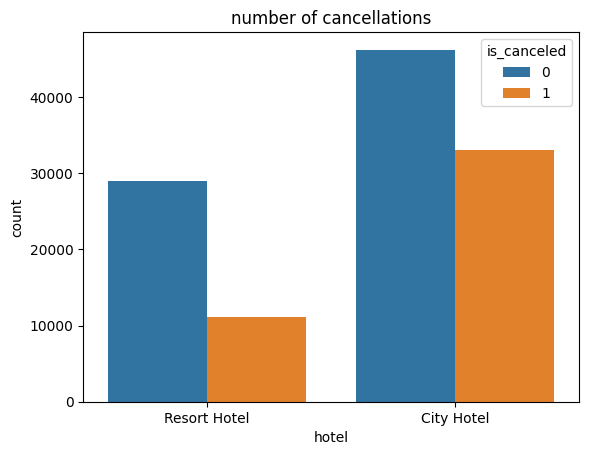

In [ ]:
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df)
plt.title("number of cancellations")
plt.show()

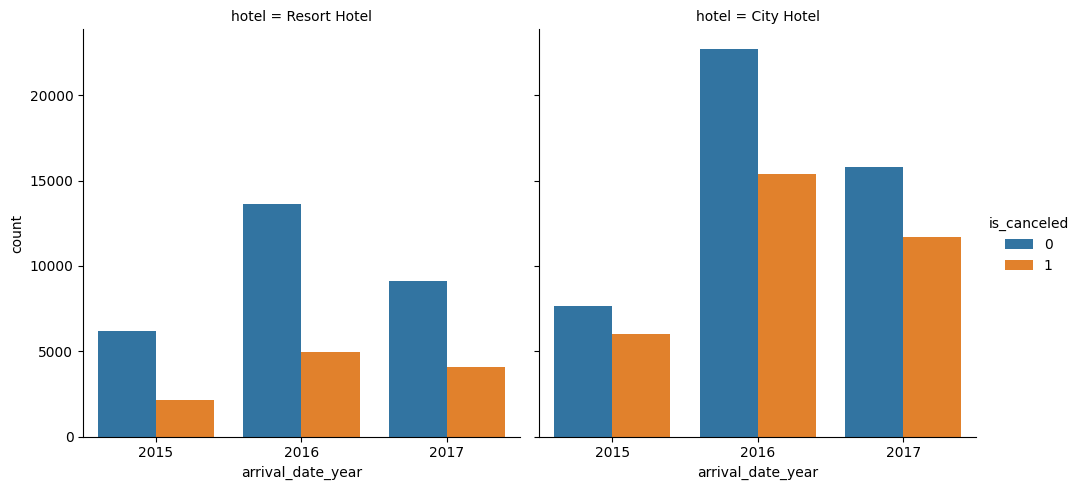

In [ ]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = df, kind="count")
plt.show()

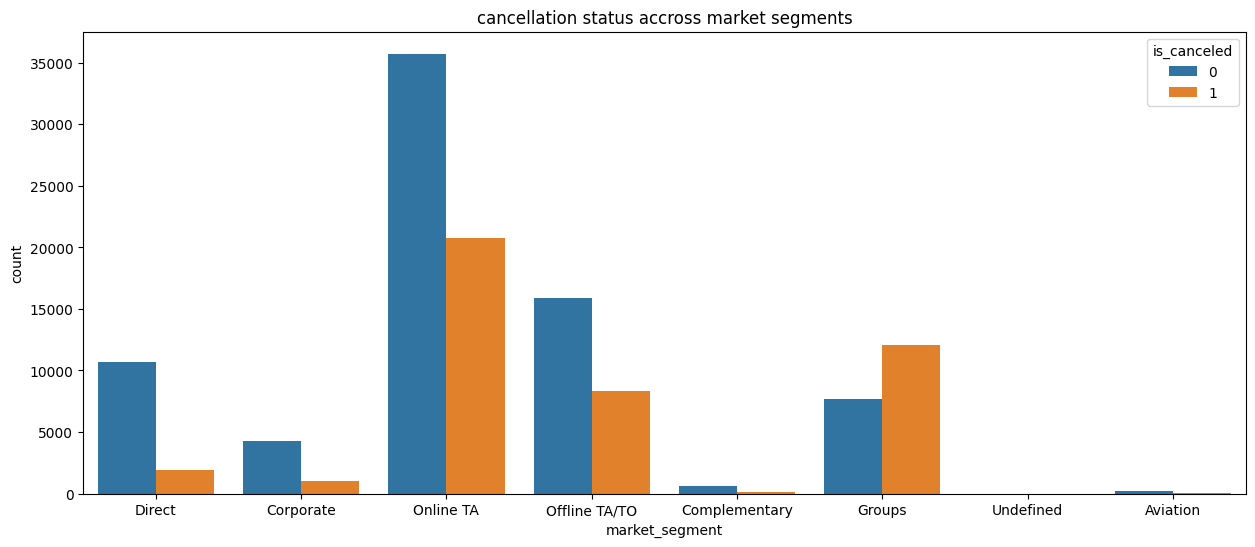

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'market_segment',data = df, hue='is_canceled')
plt.title('cancellation status accross market segments')
plt.show()

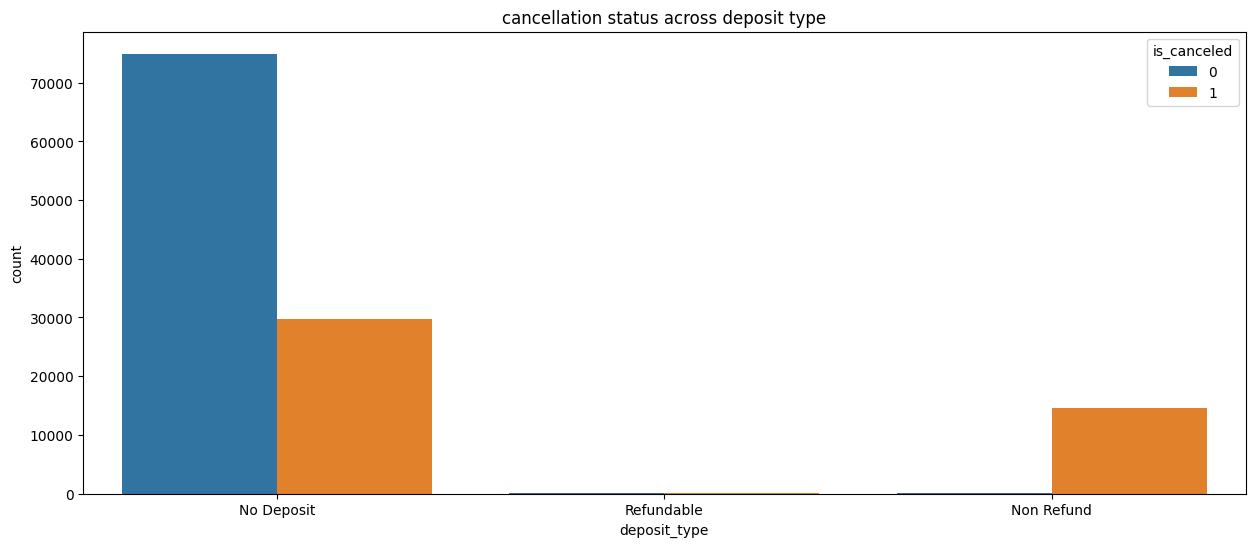

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'deposit_type',data = df, hue='is_canceled')
plt.title('cancellation status across deposit type')
plt.show()

In [ ]:
string_features = df.select_dtypes(exclude=['int64', 'float64'])
name_string_features = string_features.columns
print(name_string_features)

numeric_features = df.select_dtypes(include=['int64', 'float64'])
name_numeric_features = numeric_features.columns
print(name_numeric_features)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [ ]:
df_new = df.drop(['meal','country','reserved_room_type','assigned_room_type','stays_in_weekend_nights',
       'stays_in_week_nights','reservation_status','reservation_status_date'], axis=1)

df_new = pd.concat([df_new,
                 pd.get_dummies(df_new['hotel'], drop_first=True),
                 pd.get_dummies(df_new['arrival_date_month'], drop_first=True),
                 pd.get_dummies(df_new['market_segment'], drop_first=True),
                 #pd.get_dummies(df_new['distribution_channel'], drop_first=True),
                 #pd.get_dummies(df_new['customer_type'], drop_first=True),
                 pd.get_dummies(df_new['deposit_type'], drop_first=True)
                 ], axis=1)

df_new = df_new.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type', 'deposit_type'], axis=1)
df_new.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Non Refund,Refundable
0,0,342,2015,27,1,2,0.0,0,0,0,0,3,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,737,2015,27,1,2,0.0,0,0,0,0,4,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,7,2015,27,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,27,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,14,2015,27,1,2,0.0,0,0,0,0,0,0,98.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = df_new['is_canceled']
X = df_new.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1000 ,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score

classifier = RandomForestClassifier(n_estimators = 20, criterion='log_loss', random_state=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print ("roc_auc_score :", roc_auc_score(y_test,y_pred))

Accuracy : 0.8527794064271156
roc_auc_score : 0.8293469702295634


Удаляем выбросы по z-score

In [ ]:
from scipy import stats

z_scores_lead = stats.zscore(df_new['lead_time'])
df_no_outliers = df_new[(z_scores_lead < 3) & (z_scores_lead > -3)]

z_scores_adr = stats.zscore(df_new['adr'])
df_no_outliers = df_new[(z_scores_adr < 3) & (z_scores_adr > -3)]

In [ ]:
df_new.shape

(119390, 37)

Рассмотрим важность признаков и удалим те, которые не соответствуют порогу

In [ ]:
from sklearn.model_selection import train_test_split

y = df_no_outliers['is_canceled']
X = df_no_outliers.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1000 ,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score

classifier = RandomForestClassifier(n_estimators = 20, criterion='log_loss', random_state=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print ("roc_auc_score :", roc_auc_score(y_test,y_pred))

Accuracy : 0.8530837749464427
roc_auc_score : 0.8291332555654343


Убираем малозначимые признаки

In [ ]:
feature_importances = classifier.feature_importances_
feature_importances

array([2.03112126e-01, 2.34585687e-02, 6.46551252e-02, 1.07754607e-01,
       2.09682099e-02, 8.77477658e-03, 1.41428001e-03, 3.91540244e-03,
       3.94863476e-02, 5.55809426e-03, 2.70115770e-02, 4.22000149e-03,
       1.51992708e-01, 3.12172853e-02, 5.72526430e-02, 1.42468518e-02,
       5.10590422e-03, 2.45707600e-03, 3.48391933e-03, 2.48319542e-03,
       4.53700881e-03, 4.62508642e-03, 3.86648773e-03, 5.02291309e-03,
       2.84476181e-03, 4.31483333e-03, 3.76624935e-03, 5.46995354e-04,
       3.32496082e-03, 9.72081368e-03, 1.10663485e-02, 1.27544573e-02,
       1.85476339e-02, 5.95897061e-05, 1.35870469e-01, 5.62692602e-04])

In [ ]:
threshold = 0.01
selected_feautures = df_no_outliers.columns[1:][classifier.feature_importances_ > threshold]
selected_feautures

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'previous_cancellations',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Resort Hotel', 'Groups', 'Offline TA/TO',
       'Online TA', 'Non Refund'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

y = df_no_outliers['is_canceled']
X = df_no_outliers[selected_feautures]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1000 ,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
accuracy= []
roc_auc= []
f1 = np.array([])
model_names =[]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score

classifier = RandomForestClassifier(n_estimators = 20, criterion='log_loss', random_state=20)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
f1 = np.append(f1, round(f1_score(y_test, y_pred),4))

model_names.append('ForestClassifier')
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Roc_Auc':roc_auc, 'f1':f1}, index=model_names)
result_df1

,Accuracy,Roc_Auc,f1
ForestClassifier,0.8514,0.8272,0.7852


In [ ]:
 !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

catboost_base = CatBoostClassifier(verbose=False,random_state=0)

catboost_base.fit(X_train, y_train,eval_set=(X_test, y_test))
y_pred = catboost_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
f1 = np.append(f1, round(f1_score(y_test, y_pred),4))

model_names.append('CatBoost')
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Roc_Auc':roc_auc, 'f1':f1}, index=model_names)
result_df2

,Accuracy,Roc_Auc,f1
ForestClassifier,0.8514,0.8272,0.7852
CatBoost,0.8396,0.8096,0.7621


In [ ]:
from xgboost import XGBClassifier

xgbc_base = XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
f1 = np.append(f1, round(f1_score(y_test, y_pred),4))

model_names.append('XGBClassifier')
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Roc_Auc':roc_auc, 'f1':f1}, index=model_names)
result_df3

In [ ]:
result_df3

,Accuracy,Roc_Auc,f1
ForestClassifier,0.8514,0.8272,0.7852
CatBoost,0.8396,0.8096,0.7621
XGBClassifier,0.8365,0.8068,0.7582
